# A Deep Dive into Vodaphone's Customer Churn: Predictive Modeling using Call Data and Service Interactions




This dataset contains information on customer behavior and service quality for Vodaphone Telecommunications. Our analysis focuses on predicting customer churn, or the likelihood that a customer will leave the company, using predictive modeling techniques based on factors such as usage patterns, voicemail usage, international calling behavior, and customer service interactions. Our goal is to help Vodaphone reduce churn and improve overall customer satisfaction.

# importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing dataset

In [2]:
churn = pd.read_csv('telecom_churn_data.csv',header=None)
churn.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [3]:
column_names={0:'State',1:'Account Length',2:'Area Code',3:'Phone',4:'International Plan',5:'VMail Plan',6:'VMail Message',7:'Day Mins',8:'Day Calls',9:'Day Charge',10:'Eve Mins',11:'Eve Calls',12:'Eve Charge',13:'Night Mins',14:'Night Calls',15:'Night Charge',16:'International Mins',17:'International calls',18:'International Charge',19:'CustServ Calls',20:'Churn'}

In [4]:
len(column_names)

21

In [5]:
churn=churn.rename(columns = column_names)

In [6]:
churn.sample(5)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
1938,OR,155,408,414-4741,no,yes,30,128.5,86,21.85,...,91,16.01,254.4,85,11.45,6.8,6,1.84,1,False.
1390,NY,40,510,379-2991,no,no,0,115.7,105,19.67,...,113,10.86,107.5,91,4.84,9.3,6,2.51,1,False.
4320,KY,94,408,351-9450,no,no,0,139.1,93,23.65,...,100,20.22,227.1,59,10.22,11.4,3,3.08,1,False.
4593,MS,45,415,419-9550,no,yes,18,168.0,127,28.56,...,76,13.22,152.7,127,6.87,11.8,5,3.19,0,False.
2126,IN,94,510,360-5794,no,no,0,245.0,112,41.65,...,91,15.33,262.9,105,11.83,9.7,6,2.62,1,False.


In [7]:
churn.describe(percentiles=[0,0.15,0.25,0.75,0.85,0.95,0.96,0.97,0.98,0.99])

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
0%,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
15%,60.000000,408.000000,0.000000,125.240000,80.000000,21.288000,148.300000,80.000000,12.610000,148.140000,79.000000,6.664000,7.500000,2.000000,2.030000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
85%,141.000000,510.000000,28.000000,236.260000,121.000000,40.162000,252.760000,120.600000,21.486000,253.100000,120.000000,11.390000,13.000000,7.000000,3.510000,3.000000


In [8]:
churn['Churn'].unique()

array([' False.', ' True.'], dtype=object)

In [9]:
churn['rank(Account lenght)']=churn['Account Length'].rank(method='min',ascending=False)

In [10]:
churn['Total Charge'] = churn['Day Charge']+churn['Eve Charge']+churn['Night Charge']+churn['International Charge']

In [11]:
churn['Total Mins'] = churn['Day Mins']+churn['Eve Mins']+churn['Night Mins']+churn['International Mins']

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [13]:
churn.duplicated().sum()

0

In [14]:
churn.nunique()

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International calls       21
International Charge     168
CustServ Calls            10
Churn                      2
rank(Account lenght)     218
Total Charge            3454
Total Mins              3233
dtype: int64

In [15]:
churn.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
rank(Account lenght)    0
Total Charge            0
Total Mins              0
dtype: int64

# EDA(Exploratory Data Analysis)

In [16]:
churn

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,rank(Account lenght),Total Charge,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False.,1100.0,75.56,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False.,1966.0,59.24,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False.,798.0,62.29,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False.,3036.0,66.80,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False.,3388.0,52.09,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,122,7.14,8.5,6,2.30,3,False.,3976.0,49.83,498.3
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,116,7.36,15.7,1,4.24,3,False.,131.0,69.49,671.4
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,91,9.04,13.0,3,3.51,1,False.,3678.0,59.40,637.5
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,96,7.45,14.3,3,3.86,0,False.,2391.0,59.26,575.0


In [17]:
churn.describe(percentiles=[0,0.15,0.25,0.75,0.85,0.95,0.96,0.97,0.98,0.99])

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,rank(Account lenght),Total Charge,Total Mins
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,2292.620533,59.517390,591.779467
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,1332.769400,10.366072,89.038048
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.000000,22.930000,284.300000
0%,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.000000,22.930000,284.300000
15%,60.000000,408.000000,0.000000,125.240000,80.000000,21.288000,148.300000,80.000000,12.610000,148.140000,79.000000,6.664000,7.500000,2.000000,2.030000,0.000000,681.000000,48.824000,499.440000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,1129.000000,52.480000,532.100000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,2294.000000,59.530000,592.700000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,3424.000000,66.470000,651.100000
85%,141.000000,510.000000,28.000000,236.260000,121.000000,40.162000,252.760000,120.600000,21.486000,253.100000,120.000000,11.390000,13.000000,7.000000,3.510000,3.000000,3896.000000,70.130000,685.160000


In [18]:
quantiles = churn.quantile(0.95)
mask_vals=churn[churn>quantiles]
all_vals=churn.loc[mask_vals.all(axis=1)]
threshold=0.05
mask_vals.drop(['State','Area Code','Phone','Account Length','rank(Account lenght)'],axis=1,inplace=True)
outliers = mask_vals[mask_vals>mask_vals.max()*threshold].dropna(how='all')
print(len(outliers))
outliers

1760


,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Total Charge,Total Mins
3,NaN,NaN,NaN,299.4,NaN,50.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,348.5,NaN,29.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.31,786.8
8,NaN,NaN,NaN,NaN,NaN,NaN,351.6,NaN,29.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.6
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,326.4,NaN,14.69,NaN,NaN,NaN,NaN,NaN,80.54,818.2
10,NaN,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,NaN,NaN,NaN,278.1,NaN,47.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.99,799.0
4599,NaN,NaN,NaN,271.2,NaN,46.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.89,NaN
4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.2,NaN,13.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4613,NaN,NaN,NaN,NaN,NaN,NaN,303.1,NaN,25.76,NaN,NaN,NaN,15.7,NaN,4.24,NaN,NaN,NaN,NaN


In [19]:
quantiles = churn.quantile(0.05)
mask_vals = churn[churn < quantiles]
all_vals = churn.loc[mask_vals.all(axis=1)]
threshold = 0.001
mask_vals.drop(['State','Area Code','Phone','Account Length','rank(Account lenght)'],axis=1,inplace=True)
outliers = mask_vals[mask_vals.min() > mask_vals * threshold].dropna(how='all')
print(len(outliers))
outliers

660


,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,Total Charge,Total Mins
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.19,386.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.3,NaN,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,36.02,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.2
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.05,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.2,NaN,4.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.3,NaN,3.70,NaN,NaN,NaN,NaN,NaN,NaN,414.3
4591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
continue_columns = []
categories_columns=[]
for col in churn.columns:
    if churn[col].nunique()>25:
        print(f'{col}  is {churn[col].nunique()} values')
        continue_columns=pd.DataFrame(continue_columns.append(churn[col]))
    else:
        print(f'{col}  is {churn[col].nunique()} values')
        categories_columns=pd.DataFrame(categories_columns.append(churn[col]))
print(continue_columns,'\n....',
pd.DataFrame(categories_columns))

State  is 51 values
Account Length  is 218 values
Area Code  is 3 values
Phone  is 4617 values
International Plan  is 2 values
VMail Plan  is 2 values
VMail Message  is 47 values
Day Mins  is 1901 values
Day Calls  is 123 values
Day Charge  is 1901 values
Eve Mins  is 1833 values
Eve Calls  is 125 values
Eve Charge  is 1621 values
Night Mins  is 1813 values
Night Calls  is 130 values
Night Charge  is 1012 values
International Mins  is 168 values
International calls  is 21 values
International Charge  is 168 values
CustServ Calls  is 10 values
Churn  is 2 values
rank(Account lenght)  is 218 values
Total Charge  is 3454 values
Total Mins  is 3233 values
                           0          1          2          3          4     \
Account Length              128        107        137         84         75   
Phone                  382-4657   371-7191   358-1921   375-9999   330-6626   
VMail Message                25         26          0          0          0   
Day Mins                

In [21]:
categories_columns = categories_columns.transpose()
categories_columns

,International Plan,VMail Plan,International calls,CustServ Calls,Churn
0,no,yes,3,1,False.
1,no,yes,3,1,False.
2,no,no,5,0,False.
3,yes,no,7,2,False.
4,yes,no,3,3,False.
...,...,...,...,...,...
4612,no,yes,6,3,False.
4613,no,yes,1,3,False.
4614,no,yes,3,1,False.
4615,no,yes,3,0,False.


In [22]:
categories_columns.nunique()

International Plan      2
VMail Plan              2
International calls    21
CustServ Calls         10
Churn                   2
dtype: int64

In [23]:
continue_columns=continue_columns.transpose()
continue_columns

,Account Length,Phone,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Charge,rank(Account lenght),Total Charge,Total Mins
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.7,1100.0,75.56,717.2
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3.7,1966.0,59.24,625.2
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,3.29,798.0,62.29,539.4
3,84,375-9999,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,1.78,3036.0,66.8,564.8
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,2.73,3388.0,52.09,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,345-7512,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,2.3,3976.0,49.83,498.3
4613,177,343-6820,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,4.24,131.0,69.49,671.4
4614,67,338-4794,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3.51,3678.0,59.4,637.5
4615,98,355-8388,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3.86,2391.0,59.26,575.0


([<matplotlib.patches.Wedge at 0x20b8e6affd0>,
 [Text(0.9700519109816373, 0.7063988179497993, '3'),
  Text(-0.34025077414696814, 1.1507516720354523, '5'),
  Text(-1.1707768304103268, 0.26321400679741375, '7'),
  Text(-0.932241045172709, -0.7555968724758563, '6'),
  Text(-0.16401541072141967, -1.188738383769063, '4'),
  Text(0.4322132990416902, -1.1194604343751942, '2'),
  Text(0.7982124360020486, -0.8960228272826958, '9'),
  Text(1.0101458692709813, -0.6477694981972939, '19'),
  Text(1.1196074408331484, -0.4318323499126117, '1'),
  Text(1.1698745557685808, -0.26719566569326236, '10'),
  Text(1.1863349560331848, -0.18058065260082917, '15'),
  Text(1.1928063655389827, -0.13119822532977768, '8'),
  Text(1.196199215608121, -0.09543289044410305, '11'),
  Text(1.1983533062898635, -0.06284388040336601, '0'),
  Text(1.1993330667533817, -0.040002437324853674, '12'),
  Text(1.1996788791202362, -0.0277594487123572, '13'),
  Text(1.1998655481773945, -0.017962914489599656, '18'),
  Text(1.199959997

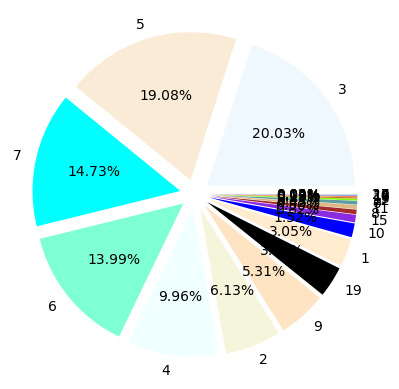

In [24]:
plt.pie(categories_columns['International calls'].value_counts(),autopct='%0.2f%%',colors=['aliceblue','antiquewhite','aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue'],explode=[0.1]*categories_columns['International calls'].nunique(),labels=categories_columns['International calls'].unique())

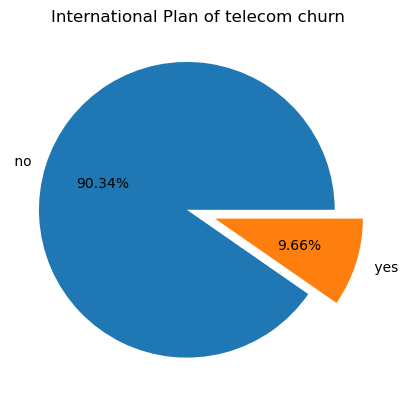

International Plan inferences-
 no     4171
 yes     446
Name: International Plan, dtype: int64


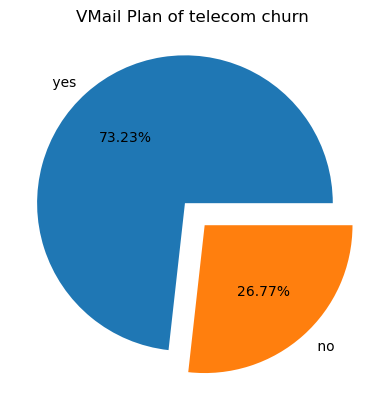

VMail Plan inferences-
 no     3381
 yes    1236
Name: VMail Plan, dtype: int64


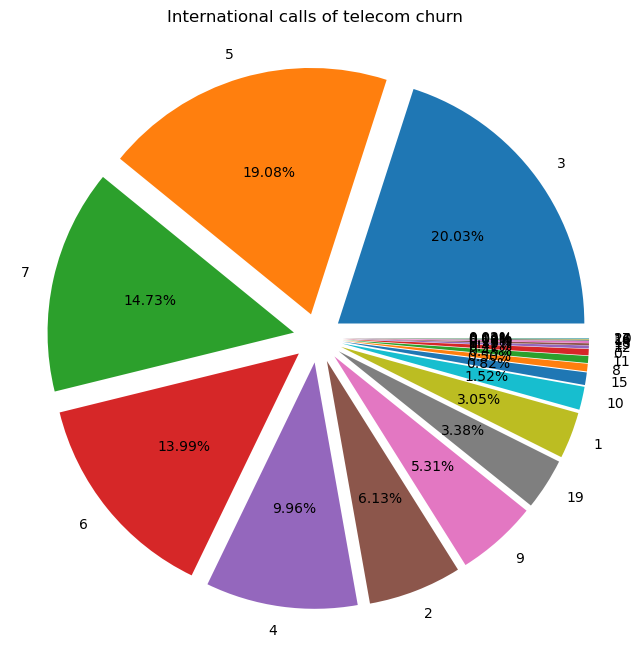

International calls inferences-
3     925
4     881
2     680
5     646
6     460
7     283
1     245
8     156
9     141
10     70
11     38
0      23
12     21
13     19
15      9
14      6
16      6
18      4
19      2
20      1
17      1
Name: International calls, dtype: int64


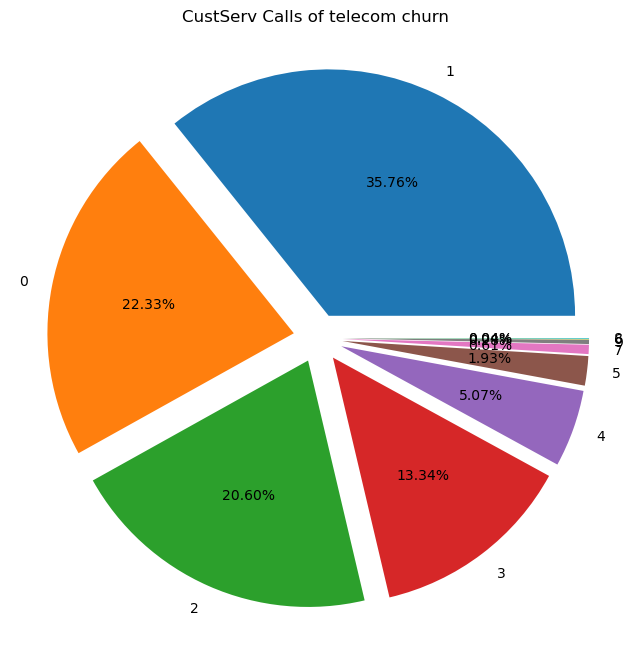

CustServ Calls inferences-
1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: CustServ Calls, dtype: int64


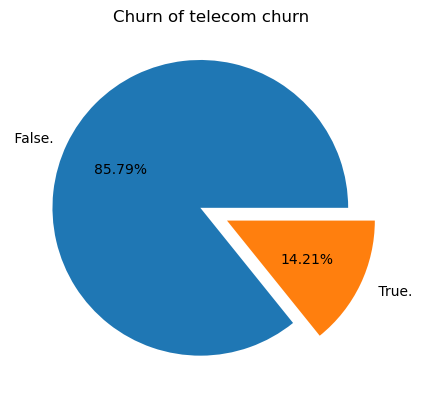

Churn inferences-
 False.    3961
 True.      656
Name: Churn, dtype: int64


In [25]:
for col in categories_columns.columns:
    #explodes=0.1*(len[categories_columns[col].])
    plt.pie(categories_columns[col].value_counts(),autopct='%0.2f%%',explode=[0.1]*categories_columns[col].nunique(),labels=categories_columns[col].unique())
    plt.title(f'{col} of telecom churn ')
    if categories_columns[col].nunique()>6:
        fig = plt.gcf()
        fig.set_size_inches(8, 8)
    plt.show()
    print(f'{col} inferences-')
    print(f'{categories_columns[col].value_counts()}')

## inferences 



- **International Plan**: Out of 4617 total customers, only 446 (9.6%) have an international plan, indicating that international calling may not be a priority for the majority of customers.
- **VMail Plan**: A higher proportion of customers (1236 out of 4617, or 26.7%) have a voicemail plan compared to an international plan, suggesting that voicemail may be a more popular feature among customers.
- **International calls**: The majority of customers make between 2 and 6 international calls, with the highest frequencies for 3 and 4 calls (925 and 881 customers, respectively). The number of international calls drops off significantly for calls beyond 6, suggesting that a small subset of customers may be responsible for a large proportion of international calls.
- **CustServ Calls**: The majority of customers have made 0-3 customer service calls, with the highest frequency for 1 call (1651 customers). A small subset of customers have made more than 3 calls, with the fewest customers (2) having made 8 or 9 calls.
- **Churn**: Out of 4617 total customers, 656 (14.2%) have churned, or left the company. This indicates that customer retention may be an important issue for the telecommunications company to address.

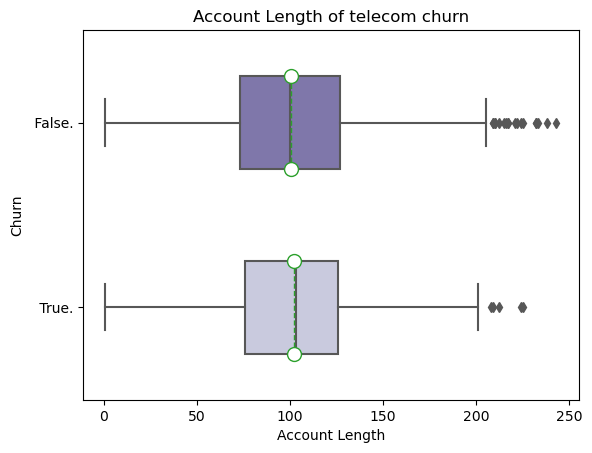

inferences- 
 Account Length of average values are 
 Churn
 False.    100.354456
 True.     102.400915
Name: Account Length, dtype: float64


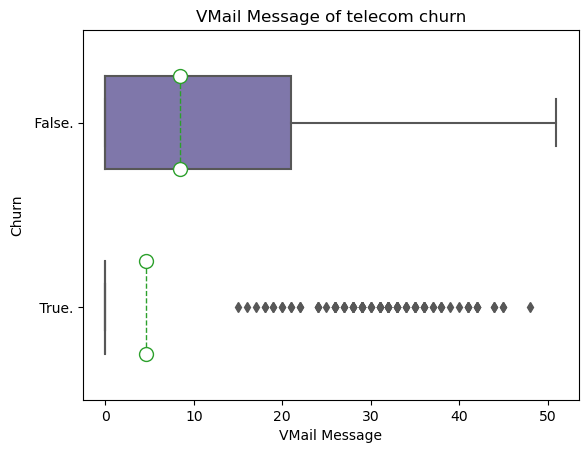

inferences- 
 VMail Message of average values are 
 Churn
 False.    8.385761
 True.     4.614329
Name: VMail Message, dtype: float64


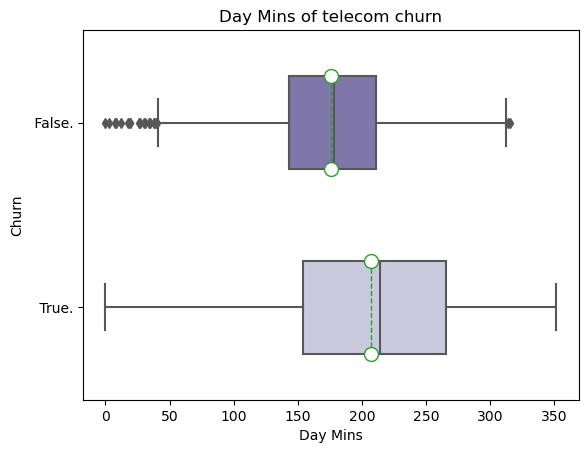

inferences- 
 Day Mins of average values are 
 Churn
 False.    176.000252
 True.     207.298018
Name: Day Mins, dtype: float64


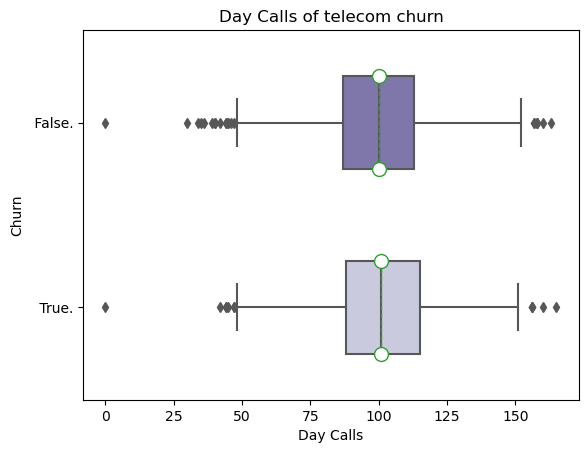

inferences- 
 Day Calls of average values are 
 Churn
 False.     99.922747
 True.     100.849085
Name: Day Calls, dtype: float64


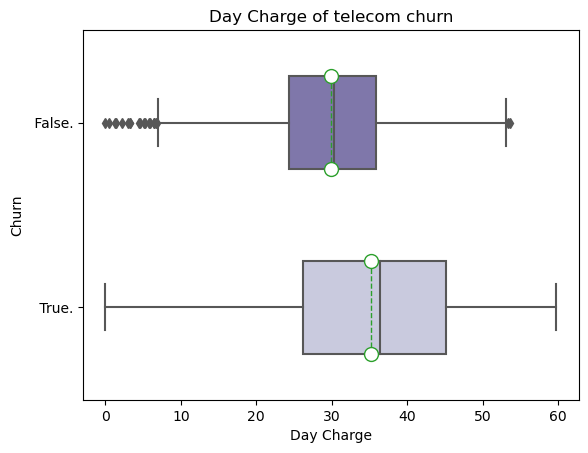

inferences- 
 Day Charge of average values are 
 Churn
 False.    29.920624
 True.     35.241098
Name: Day Charge, dtype: float64


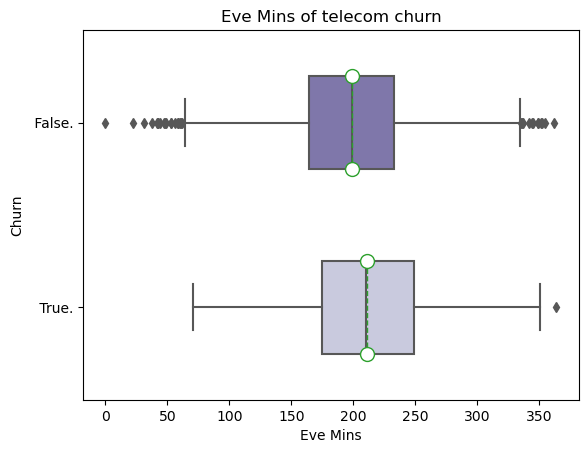

inferences- 
 Eve Mins of average values are 
 Churn
 False.    198.638425
 True.     211.241311
Name: Eve Mins, dtype: float64


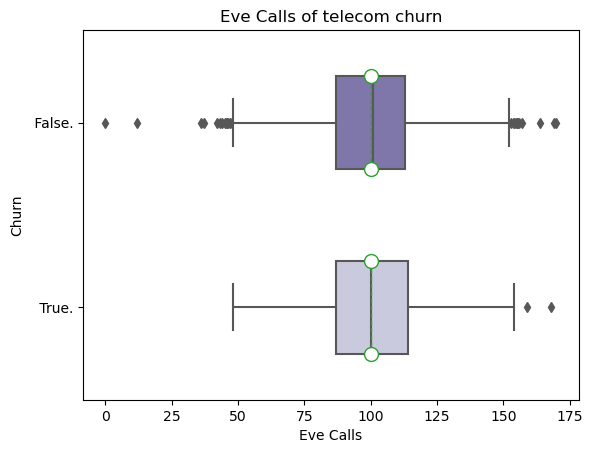

inferences- 
 Eve Calls of average values are 
 Churn
 False.    100.16410
 True.     100.27439
Name: Eve Calls, dtype: float64


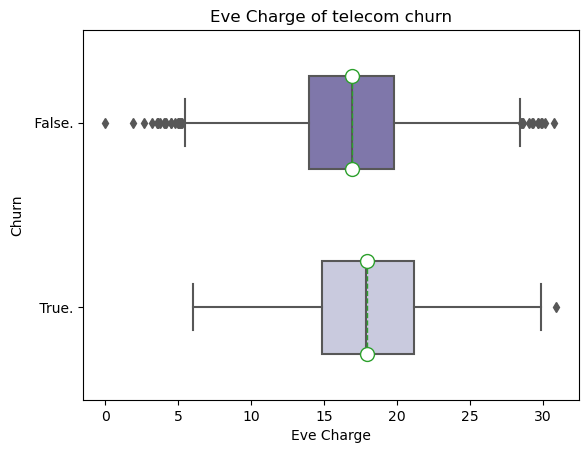

inferences- 
 Eve Charge of average values are 
 Churn
 False.    16.884509
 True.     17.955671
Name: Eve Charge, dtype: float64


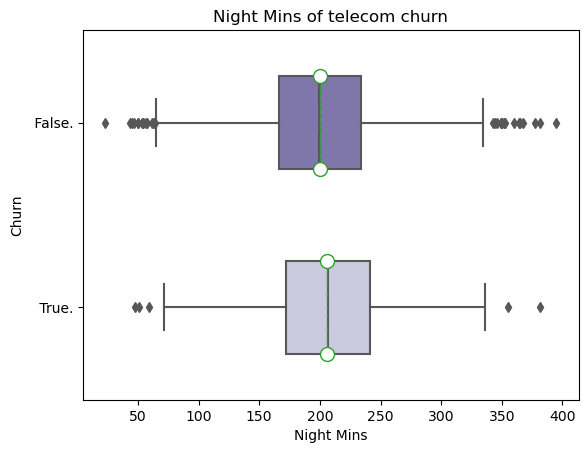

inferences- 
 Night Mins of average values are 
 Churn
 False.    199.734158
 True.     205.996494
Name: Night Mins, dtype: float64


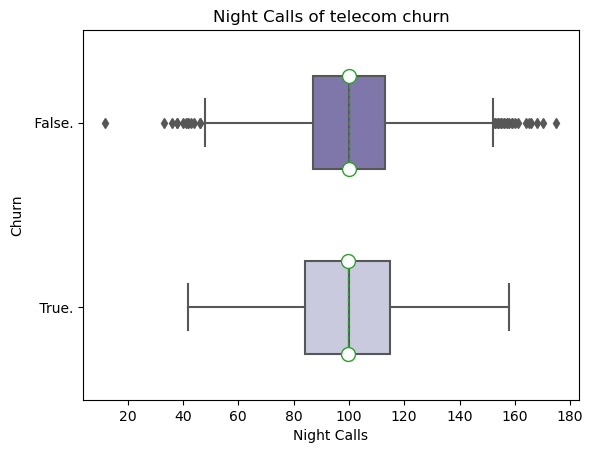

inferences- 
 Night Calls of average values are 
 Churn
 False.    99.998233
 True.     99.617378
Name: Night Calls, dtype: float64


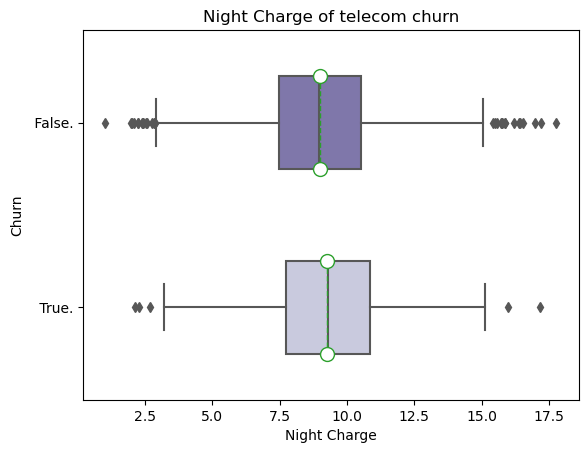

inferences- 
 Night Charge of average values are 
 Churn
 False.    8.988147
 True.     9.269939
Name: Night Charge, dtype: float64


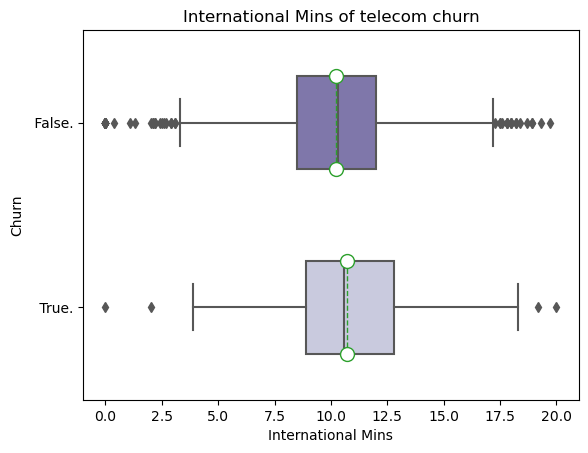

inferences- 
 International Mins of average values are 
 Churn
 False.    10.206665
 True.     10.717835
Name: International Mins, dtype: float64


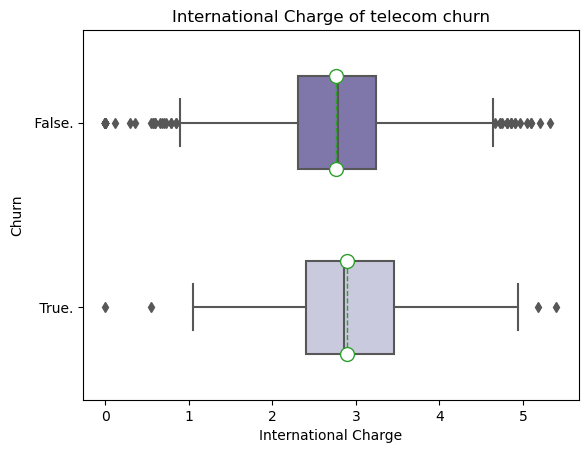

inferences- 
 International Charge of average values are 
 Churn
 False.    2.756319
 True.     2.894314
Name: International Charge, dtype: float64


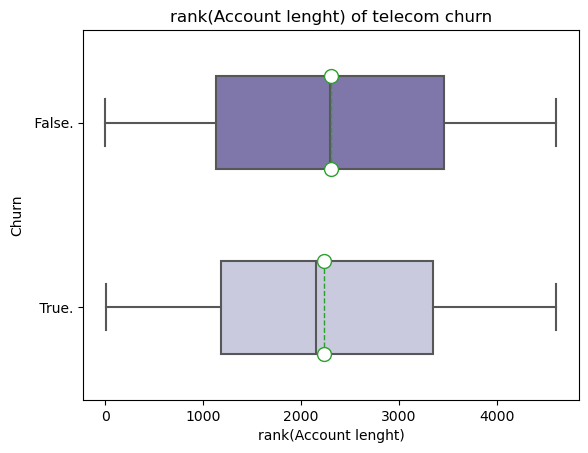

inferences- 
 rank(Account lenght) of average values are 
 Churn
 False.    2301.985862
 True.     2236.071646
Name: rank(Account lenght), dtype: float64


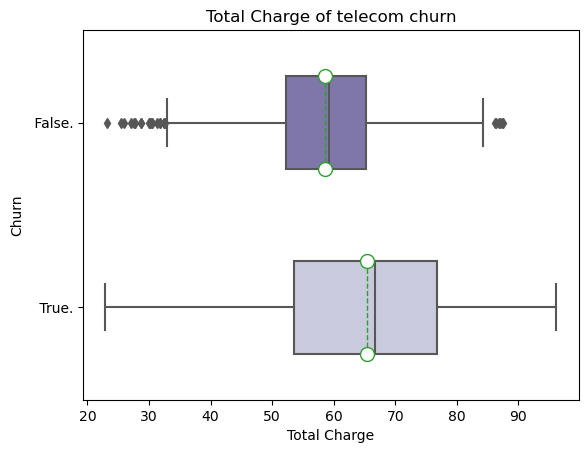

inferences- 
 Total Charge of average values are 
 Churn
 False.    58.549599
 True.     65.361021
Name: Total Charge, dtype: float64


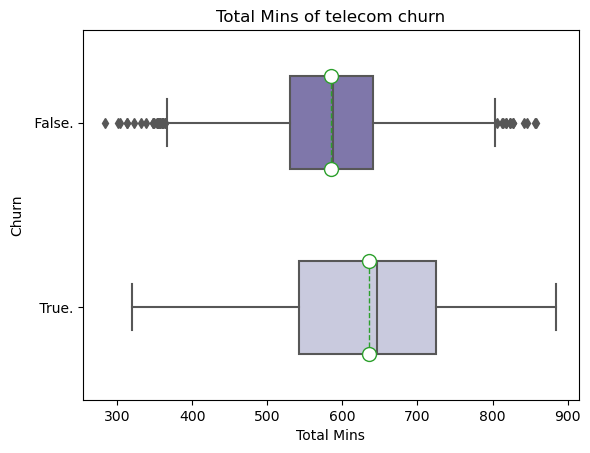

inferences- 
 Total Mins of average values are 
 Churn
 False.    584.579500
 True.     635.253659
Name: Total Mins, dtype: float64


In [26]:
continue_columns.drop('Phone',axis=1,inplace=True)
for col in continue_columns.columns:
    sns.boxplot(x=continue_columns[col],y=categories_columns['Churn'],showmeans=True ,width=0.5, linewidth=1.5,meanprops={"marker":"o","markerfacecolor":"white", "markersize":"10"}, meanline=True,palette='Purples_r')
    plt.title(f'{col} of telecom churn')
    plt.show()
    mean_values = churn.groupby("Churn")[col].mean()
    print(f'inferences- \n {col} of average values are \n {mean_values}')

## inferences 



- Account Length: The average account length for customers who churned is slightly higher than those who didn't churn.
- VMail Message: Customers who churned had fewer average voicemail messages than those who didn't churn.
- Day Mins: Customers who churned had higher average daytime minutes than those who didn't churn.
- Day Calls: The average number of day calls is relatively similar between customers who churned and those who didn't churn.
- Day Charge: Customers who churned had higher average daytime charges than those who didn't churn.
- Eve Mins: Customers who churned had higher average evening minutes than those who didn't churn.
- Eve Calls: The average number of evening calls is relatively similar between customers who churned and those who didn't churn.
- Eve Charge: Customers who churned had higher average evening charges than those who didn't churn.
- Night Mins: Customers who churned had higher average nighttime minutes than those who didn't churn.
- Night Calls: The average number of nighttime calls is relatively similar between customers who churned and those who didn't churn.
- Night Charge: Customers who churned had slightly higher average nighttime charges than those who didn't churn.
- International Mins: The average number of international minutes is relatively similar between customers who churned and those who didn't churn.
- International Charge: The average international charge is relatively similar between customers who churned and those who didn't churn.
- Rank (Account Length): The rank of account length for customers who churned is slightly lower than those who didn't churn.
- Total Charge: Customers who churned had higher average total charges than those who didn't churn.
- Total Mins: Customers who churned had higher average total minutes than those who didn't churn.

<AxesSubplot:xlabel='Churn', ylabel='Total Mins'>

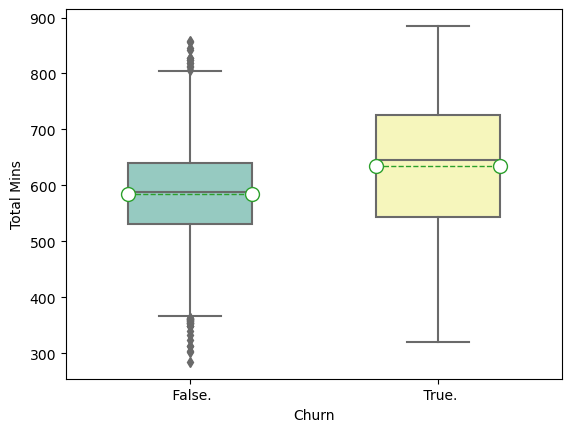

In [27]:
sns.boxplot(y='Total Mins',x='Churn',data=churn,showmeans=True ,width=0.5, linewidth=1.5, palette="Set3",meanprops={"marker":"o","markerfacecolor":"white", "markersize":"10"}, meanline=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

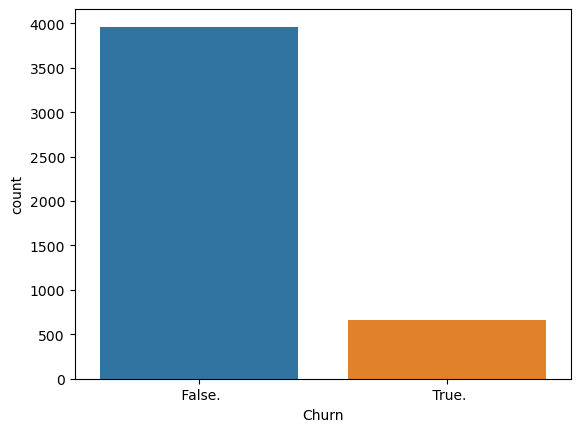

In [28]:
sns.countplot(x='Churn',data=churn)

inferences- 


 The countplot shows that the majority of customers in the dataset are not likely to churn, with a count of around 4000, while the number of customers who are likely to churn is significantly lower, with a count of around 650. This indicates that the dataset is imbalanced towards the non-churning customers.

<AxesSubplot:xlabel='Churn', ylabel='VMail Message'>

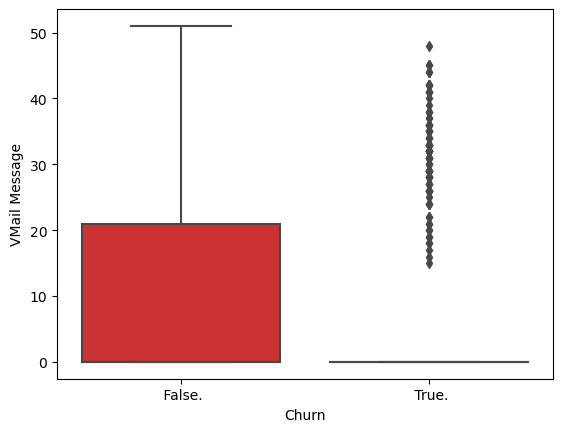

In [29]:
sns.boxplot(x='Churn',y='VMail Message',data=churn,palette='Set1')

inferences-
     
    
From the boxplot, it appears that the median value for VMail Message is higher for customers who did not churn (False) than those who did (True). Additionally, the interquartile range (IQR) is larger for customers who did not churn, indicating that there is a greater variation in the VMail Message values for these customers. This suggests that customers who are not using voicemail messaging may be less likely to churn, as compared to those who are using voicemail messaging.

<AxesSubplot:xlabel='Churn', ylabel='Account Length'>

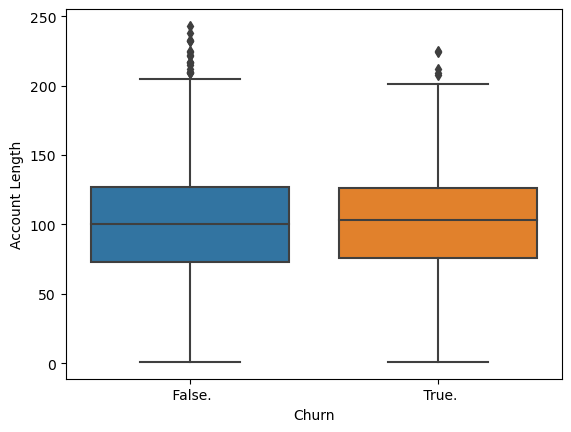

In [30]:
sns.boxplot(x='Churn',y='Account Length',data=churn)

inferences-



It can be inferred from the boxplot that the distribution of Account Length for both churn and non-churn customers is almost the same, with a median value around 100 for both categories. This suggests that Account Length doesn't have much effect on churn, as the length of time a customer has been with the network doesn't seem to be a significant factor in their decision to leave. However, there are more outliers in the false category, which means that some customers who have been with the network for a longer time are less likely to churn.

It is important to note that Account Length alone cannot be used as the sole predictor of churn, as other factors such as service quality, pricing, and customer support can also play a role in a customer's decision to switch networks. Therefore, a more comprehensive analysis of various factors affecting churn is necessary to make accurate predictions and take appropriate measures to retain customers.

<AxesSubplot:xlabel='Churn', ylabel='Area Code'>

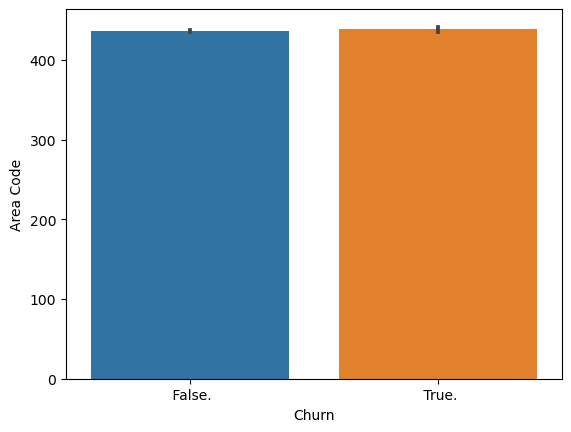

In [31]:
sns.barplot(x='Churn',y='Area Code',data=churn)

inferences-

Based on the barplot, it seems that there is no significant difference in the area code between customers who churned and those who did not. The number of customers in each area code seems to be evenly distributed between those who churned and those who did not. Therefore, we can infer that the area code is not a strong predictor of churn.

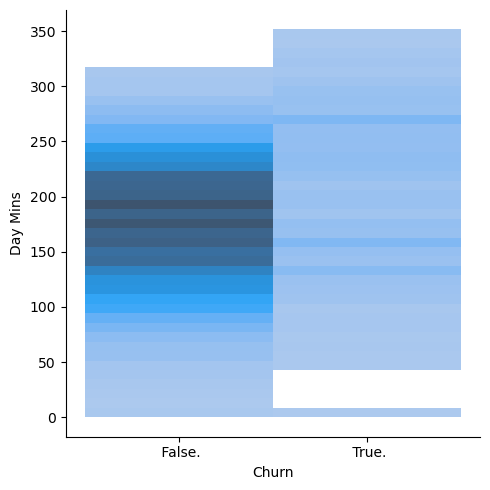

In [32]:
sns.displot(x='Churn',y='Day Mins',data=churn)

inferences-


From the plot, we can see that the distribution of Day Mins is similar for both churn classes, with a slight shift towards higher Day Mins for the True churn customers. The plot suggests that there is no clear separation between the two classes based on the Day Mins feature. However, we can say that customers who use more Day Mins are slightly more likely to churn than those who use fewer Day Mins.
The darker is colour the more number of customers using


 here we can see most True churn  customers are more likely to using 100 to 250 minutes  in a day   


<AxesSubplot:xlabel='Day Charge', ylabel='Churn'>

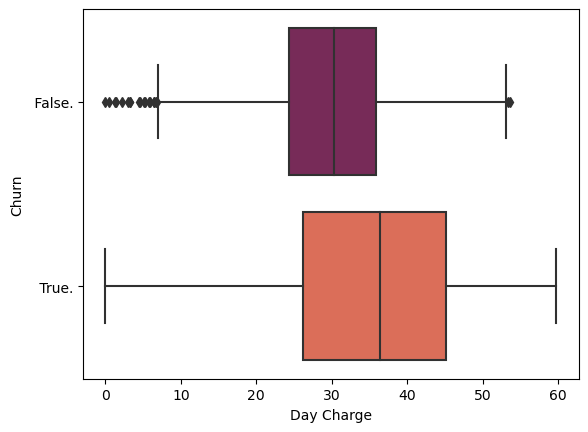

In [33]:
sns.boxplot(x='Day Charge',y='Churn',data=churn,palette='rocket')

inferences-

Based on the boxplot, we can infer that there is a significant difference in the Day Charges between the customers who have churned and those who have not. The median day charge for customers who have churned is higher compared to those who have not churned. This indicates that customers who are paying higher day charges are more likely to switch to a different network. It could be due to a variety of factors such as poor network coverage, high call or data charges, or better offers from competitors.

<AxesSubplot:xlabel='Churn', ylabel='Day Calls'>

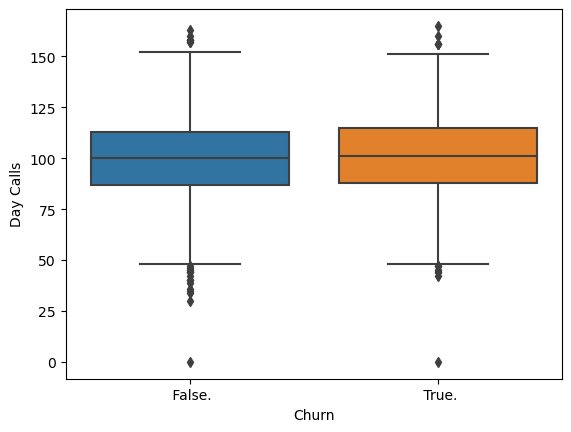

In [34]:
sns.boxplot(x='Churn',y='Day Calls',data=churn)

inferences-

Based on the boxplot, we can see that the median number of day calls for both true and false churn customers are almost equal. Therefore, we can infer that the number of day calls does not seem to have a significant effect on whether a customer wants to change their network or not.

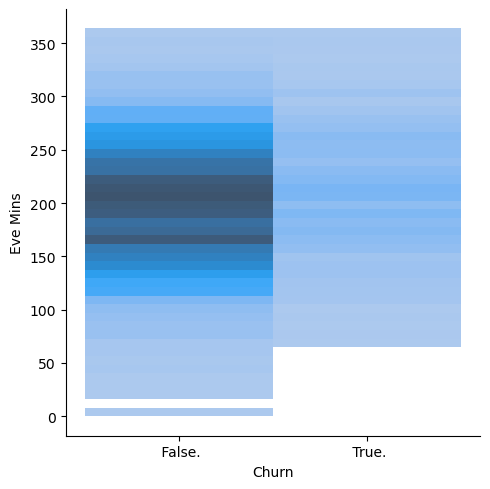

In [35]:
sns.displot(x='Churn',y='Eve Mins',data=churn)

inferences-



It seems that the distribution of Eve Mins for both True and False churn customers is quite similar, with most customers using between 100 to 290 minutes in the evening. However, there is a slightly higher concentration of True churn customers in the range of 100 to 200 minutes compared to False churn customers.

<AxesSubplot:xlabel='Churn', ylabel='Eve Calls'>

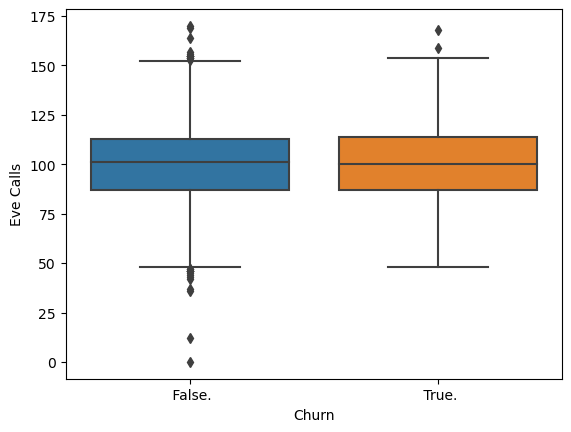

In [36]:
sns.boxplot(x='Churn',y='Eve Calls',data=churn)

inferences-

Based on the boxplot, the number of evening calls made by customers who churned and those who didn't churn seems to be similar, with the median values being close to each other. There are some outliers present, but overall, there doesn't seem to be a significant difference between the two groups in terms of the number of evening calls.

<AxesSubplot:xlabel='Churn', ylabel='Eve Charge'>

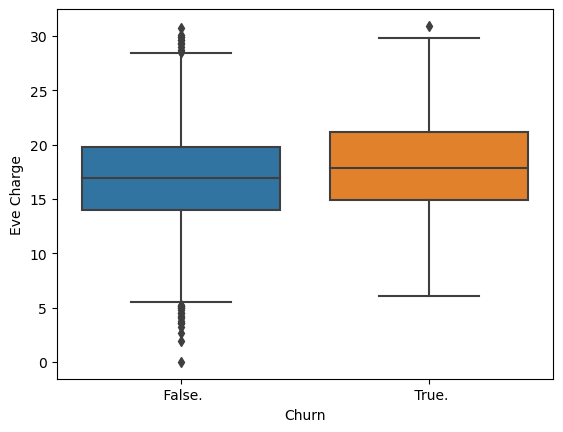

In [37]:
sns.boxplot(x='Churn',y='Eve Charge',data=churn)

inferences-

Based on the boxplot, we can see that True customers who want to change their network are paying more charges for evening calls compared to False customers who don't want to change their network. This could be a contributing factor for True customers to churn.

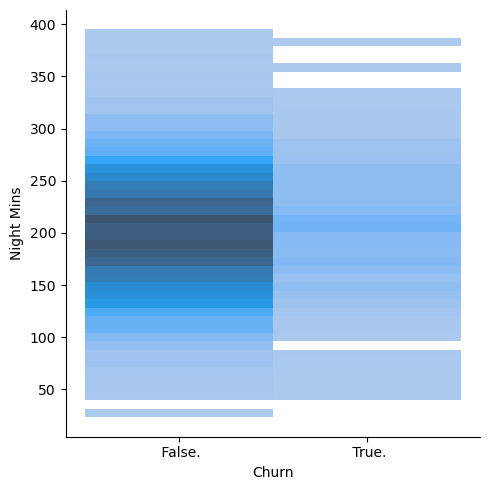

In [38]:
sns.displot(x='Churn',y='Night Mins',data=churn)

inferences-



The distribution plot indicates that the usage of night minutes is relatively similar for both True and False churn customers. However, there is a slightly higher concentration of True churn customers in the range of 150-200 minutes, while the concentration of True churn customers decreases in the range of 200-250 minutes. This suggests that the usage of night minutes may not be a significant differentiating factor between the two groups in terms of churn.

<AxesSubplot:xlabel='Churn', ylabel='Night Calls'>

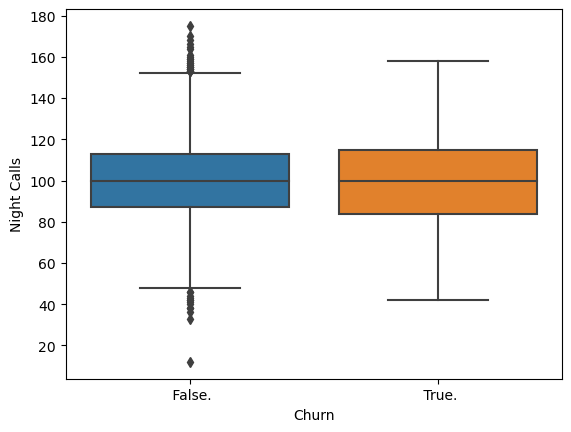

In [39]:
sns.boxplot(x='Churn',y='Night Calls',data=churn)

inferences-
The boxplot analysis reveals that there is no noticeable difference in the median and distribution of night calls between True churn customers (customers who want to change their network) and False churn customers (customers who do not want to change their network). This suggests that the number of night calls may not play a significant role in customers' decision-making process regarding churn.

<AxesSubplot:xlabel='Churn', ylabel='Night Charge'>

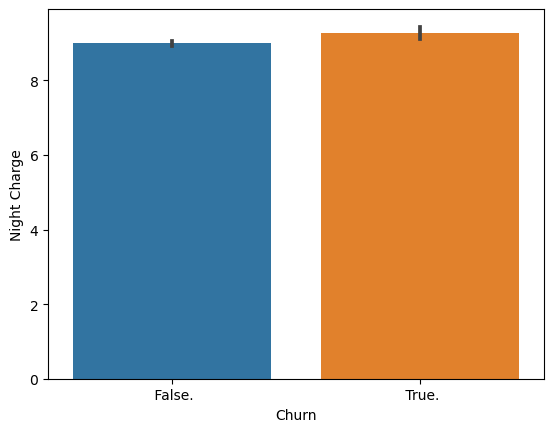

In [40]:
sns.barplot(x='Churn',y='Night Charge',data=churn)

Inferences: 

There is a noticeable difference in the average Night Charge between the two types of customers. The average Night Charge for True customers (customers who want to change their network) is higher than that of False customers (customers who do not want to change their network). This could be a contributing factor to why True customers are more likely to churn.

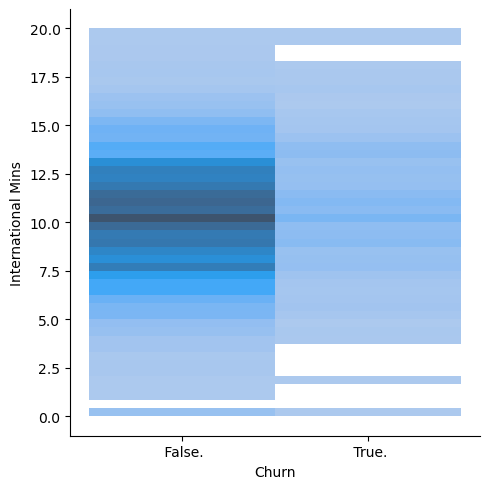

In [41]:
sns.displot(x='Churn',y='International Mins',data=churn)

Inferences: 

The distribution of International Mins is similar for both types of customers. However, the majority of customers, regardless of churn status, are using less than 15 minutes of international calling.

<AxesSubplot:xlabel='Churn', ylabel='International calls'>

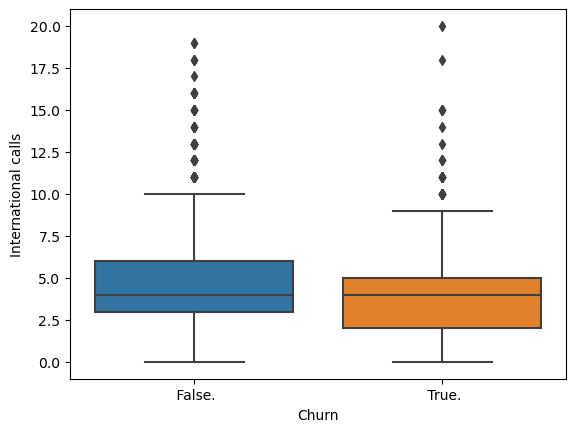

In [42]:
sns.boxplot(x='Churn',y='International calls',data=churn)

Inferences: 

The number of international calls made by customers is roughly the same for both churned and non-churned customers based on the box plot. Therefore, the number of international calls may not be a significant factor in determining churn.

<AxesSubplot:xlabel='Churn', ylabel='International Charge'>

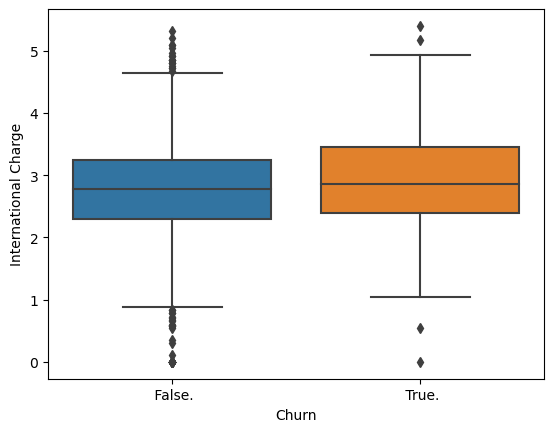

In [43]:
sns.boxplot(x='Churn',y='International Charge',data=churn)

Inferences: 

The box plot shows that the median international charge for churned customers is higher than the median charge for non-churned customers. This suggests that higher international charges may be a contributing factor in customers' decisions to switch networks.

<AxesSubplot:xlabel='Churn', ylabel='CustServ Calls'>

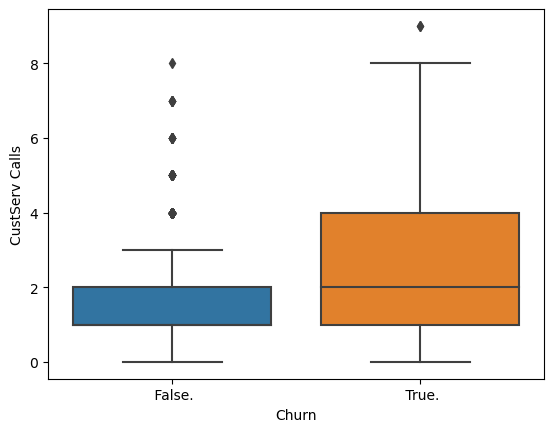

In [44]:
sns.boxplot(x='Churn',y='CustServ Calls',data=churn)

inferences-

The number of customer service calls made by the customers who churned is higher than those who did not churn. This suggests that customers who are not satisfied with the service they are receiving may be more likely to switch to another service provider.

<AxesSubplot:xlabel='Day Calls', ylabel='Day Charge'>

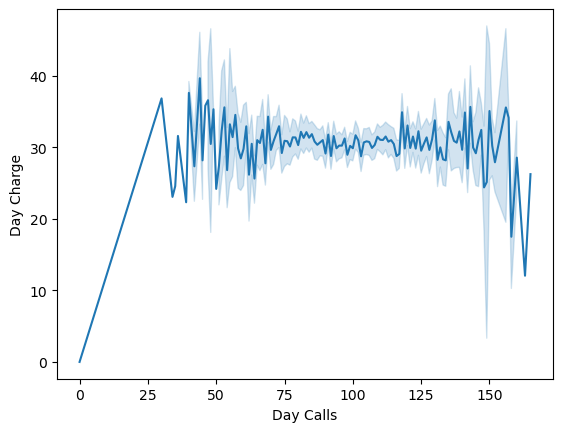

In [45]:
sns.lineplot(x='Day Calls',y='Day Charge',data=churn)

inferences-

The line plot shows the relationship between Day Calls and Day Charge for all customers. It seems that as the number of day calls increases, there is a slight increase in day charges as well. However, the plot also shows some fluctuations in the day charges even with the same number of day calls. It is interesting to note that most of the day charges fall within the range of 20 to 35, regardless of the number of day calls.

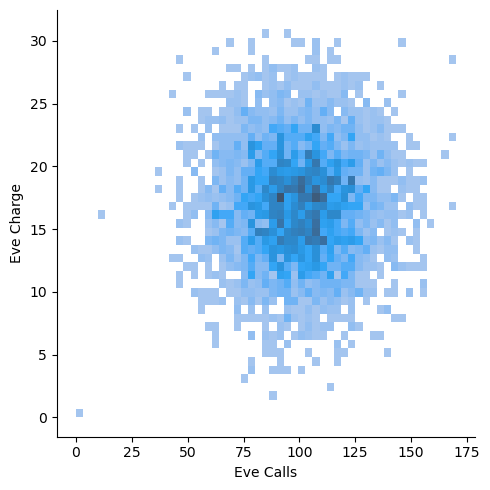

In [46]:
sns.displot(x='Eve Calls',y='Eve Charge',data=churn)

inferences-


The plot confirms the previous inference that most evening charges are between 10 to 20. It also shows that there is a positive correlation between evening calls and evening charges, meaning that as the number of evening calls increases, the evening charges also tend to increase. However, this relationship is not very strong.

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

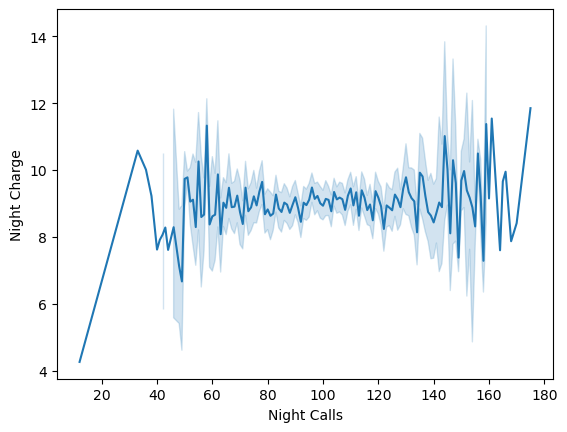

In [47]:
sns.lineplot(x='Night Calls',y='Night Charge',data=churn)

inferences-

It's not accurate to make such a conclusion based on the given lineplot. The lineplot shows the relationship between "Night Calls" and "Night Charge", not the distribution of charges across different night call timings. It only indicates that as the number of night calls increases, the corresponding night charges also tend to increase.

<AxesSubplot:xlabel='International calls', ylabel='International Charge'>

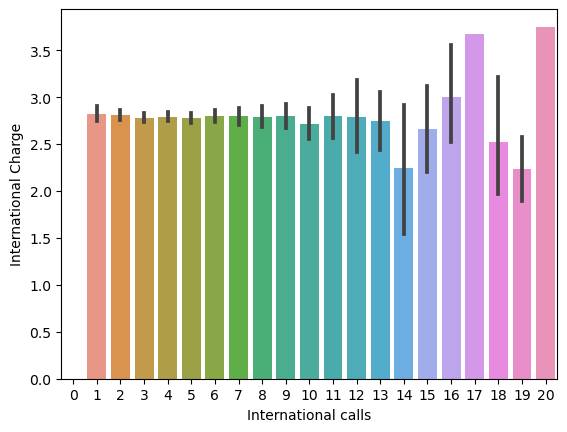

In [48]:
sns.barplot(x='International calls',y='International Charge',data=churn)

inferences-


It looks like the plot is showing the average international charge for different number of international calls. 

We can see that the international charges are generally increasing as the number of international calls increases, but the relationship is not very strong. The average charge stays relatively constant between 2.5 to 3 for most number of international calls.

<AxesSubplot:xlabel='Churn', ylabel='Total Charge'>

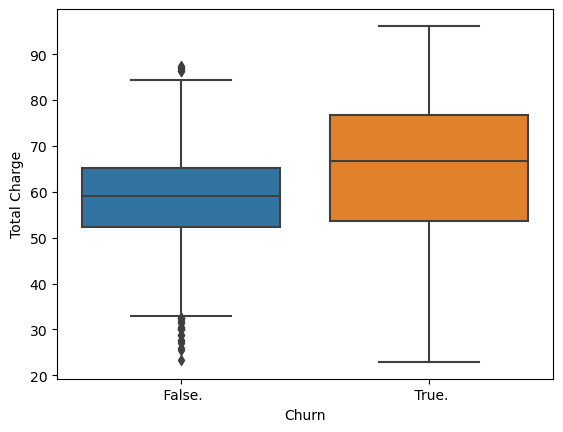

In [49]:
sns.boxplot(x='Churn',y='Total Charge',data=churn)

inferences-



Based on the boxplot, we can see that the median total charge for churn customers is slightly higher than that of non-churn customers. This suggests that higher charges may be a contributing factor to customers switching to other networks. However, we should also consider other factors such as the quality of service, network coverage, and pricing plans offered by the company.

In [50]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [51]:
churn['Churn']=label.fit_transform(churn['Churn'])
churn['International Plan']=label.fit_transform(churn['International Plan'])
churn['VMail Plan']=label.fit_transform(churn['VMail Plan'])

churn True and YES is encoded as 1



churn False and NO is encoded as 0

In [52]:
churn.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,rank(Account lenght),Total Charge,Total Mins
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1100.0,75.56,717.2
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,1966.0,59.24,625.2
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,798.0,62.29,539.4
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,3036.0,66.80,564.8
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,3388.0,52.09,512.0


In [53]:
print(list(churn))

['State', 'Account Length', 'Area Code', 'Phone', 'International Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'International Mins', 'International calls', 'International Charge', 'CustServ Calls', 'Churn', 'rank(Account lenght)', 'Total Charge', 'Total Mins']


In [54]:
churn_charges = churn[[ 'Account Length', 'Area Code', 'Phone','Day Charge','Eve Charge','Night Charge','International Charge','Churn']]

In [55]:
churn_charges

,Account Length,Area Code,Phone,Day Charge,Eve Charge,Night Charge,International Charge,Churn
0,128,415,382-4657,45.07,16.78,11.01,2.70,0
1,107,415,371-7191,27.47,16.62,11.45,3.70,0
2,137,415,358-1921,41.38,10.30,7.32,3.29,0
3,84,408,375-9999,50.90,5.26,8.86,1.78,0
4,75,415,330-6626,28.34,12.61,8.41,2.73,0
...,...,...,...,...,...,...,...,...
4612,57,510,345-7512,24.48,15.91,7.14,2.30,0
4613,177,408,343-6820,32.13,25.76,7.36,4.24,0
4614,67,408,338-4794,21.68,25.17,9.04,3.51,0
4615,98,415,355-8388,28.71,19.24,7.45,3.86,0


In [56]:
x=churn_charges.iloc[:,3:-1]

<AxesSubplot:>

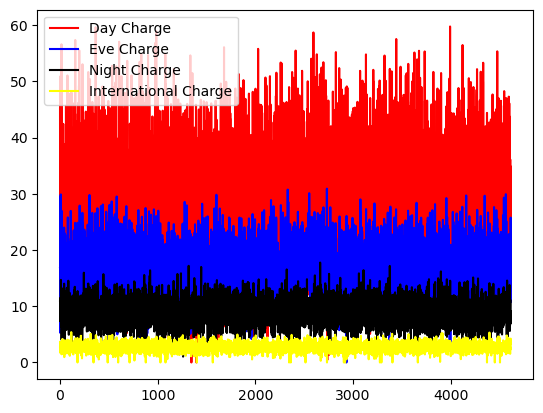

In [57]:
x.plot(kind='line',color=['red','blue','black','yellow','pink'])

inferences-

The charges for the telecom service vary throughout the day. The highest charges are observed during the day, followed by the evening, night, and international charges. This suggests that the pricing structure of the telecom service is designed to reflect different rates based on the time of usage and location (domestic or international).

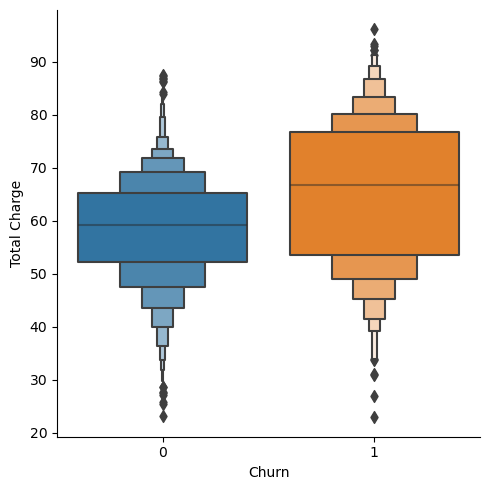

In [58]:
sns.factorplot(x='Churn',y='Total Charge',data=churn,kind='boxen')

inferences-



Customers who churn (i.e., switch to a different network) tend to have lower total charges compared to customers who stay with the current network. This finding suggests that the amount customers are paying for their telecom services may influence their decision to switch to a different network.

The boxen plot shows that the median and upper quartile values for total charges are higher for customers who do not churn (False) compared to those who churn (True). This indicates that customers who are more satisfied with their current network and services are willing to pay higher charges.

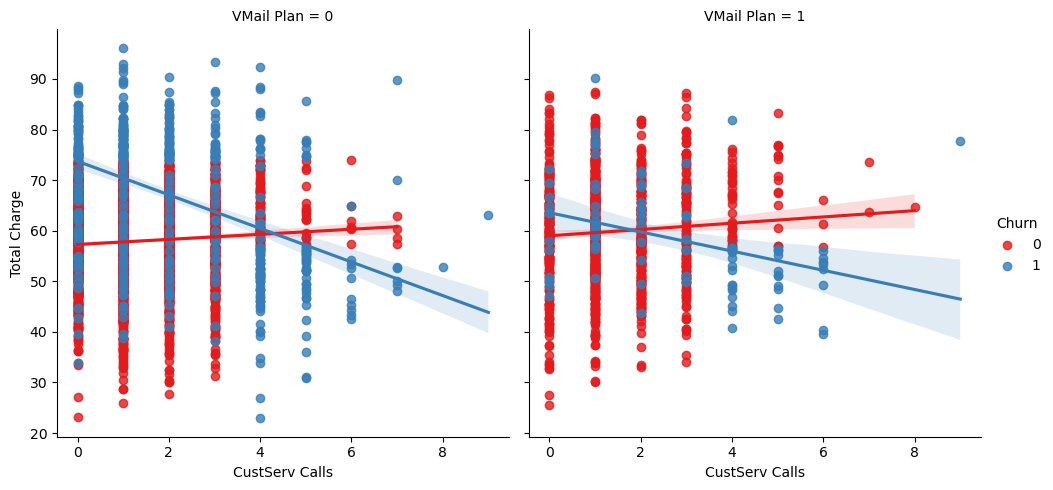

In [59]:
sns.lmplot(x='CustServ Calls',y='Total Charge',data=churn,col='VMail Plan',hue='Churn',palette='Set1')

inferences-

In Figure 1, represented by blue dots, we can see that customers who have a voicemail plan (VMail Plan = Yes) and make a higher number of customer service calls (CustServ Calls) tend to have higher total charges. This could suggest that these customers require additional support or have specific service needs that result in increased charges. However, it is important to note that these customers are less likely to churn (Churn = False), as indicated by the predominance of blue dots.

In Figure 2, represented by red dots, we observe that customers who do not have a voicemail plan (VMail Plan = No) and make a higher number of customer service calls (CustServ Calls) have relatively lower total charges. This implies that these customers may not be utilizing additional services or incurring extra charges for features like voicemail. However, these customers are more likely to churn (Churn = True), as indicated by the prevalence of red dots.

These findings suggest that the combination of a high number of customer service calls, absence of a voicemail plan, and lower total charges may be contributing factors to customer churn. The telecom provider can investigate why these customers are experiencing a higher churn rate and develop strategies to improve their satisfaction and retention. This could involve addressing their specific service needs, providing incentives for activating voicemail plans, or optimizing customer service support to minimize the number of calls and enhance the overall customer experience.

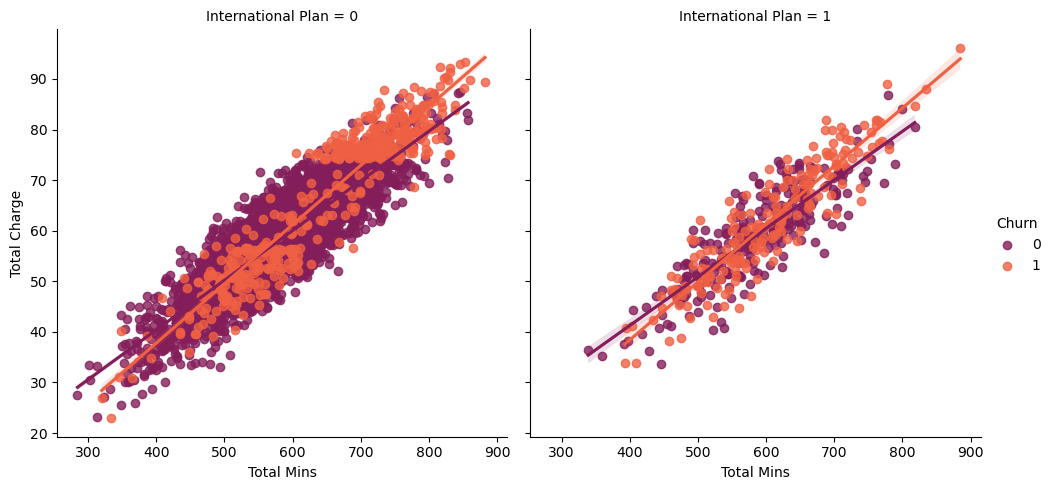

In [60]:
sns.lmplot(x='Total Mins',y='Total Charge',data=churn,col='International Plan',hue='Churn',palette='rocket')

inferences-

Based on these findings, it appears that customers who are active on an international plan but have low usage in terms of minutes may not find the plan valuable or may have alternative options for international calling. The telecom provider can investigate the reasons behind this trend and consider strategies to improve the perceived value of the international plan, such as offering competitive rates, additional features, or personalized offers based on individual calling needs.

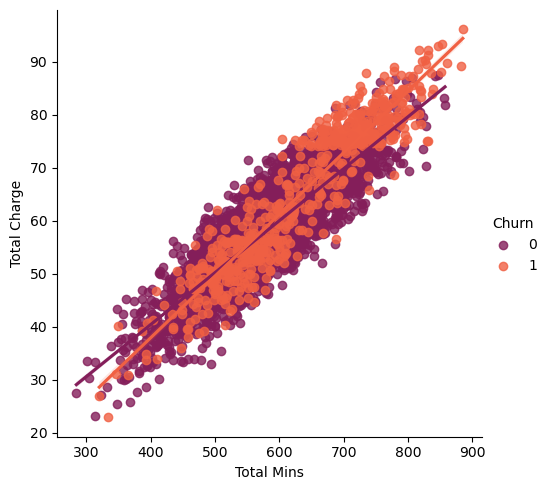

In [61]:
sns.lmplot(x='Total Mins',y='Total Charge',data=churn,hue='Churn',palette='rocket')

inferences-


Based on these findings, it can be inferred that the telecom provider's pricing structure is based on the usage of minutes, where higher usage results in higher charges. This relationship can potentially impact customer satisfaction and retention, as customers may evaluate the value they receive based on the charges incurred for their usage.


<AxesSubplot:xlabel='Churn', ylabel='International Plan'>

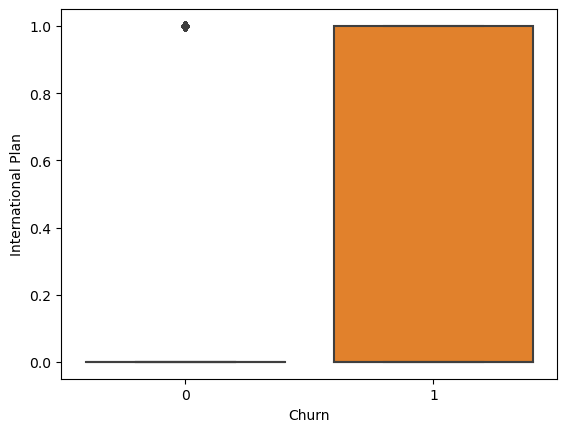

In [62]:
sns.boxplot(x='Churn',y='International Plan',data=churn)

inferences-
In the box plot, we have the International Plan on the y-axis and the Churn status on the x-axis. The box plot provides information about the distribution of the International Plan activation for each churn category.

From the plot, we can see that the box representing the activation of the International Plan for churned customers (Churn = True) is positioned higher than the box for non-churned customers (Churn = False). This indicates that a larger proportion of churned customers have activated the International Plan compared to non-churned customers.


<AxesSubplot:xlabel='Churn', ylabel='Total Mins'>

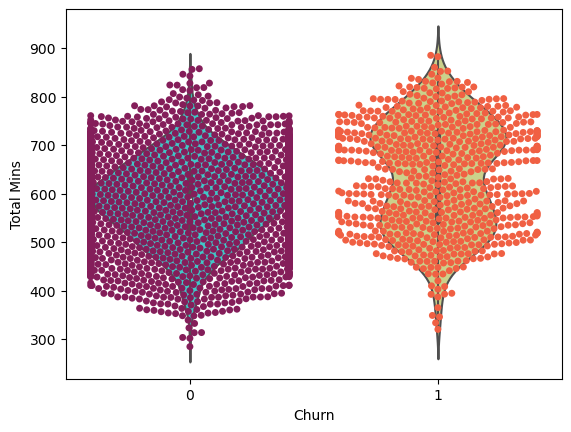

In [63]:
sns.violinplot(x="Churn",y="Total Mins", data=churn,palette='rainbow', size = 5)
sns.swarmplot(x="Churn", y="Total Mins", data=churn, size = 5,palette='rocket')

inferences-

The violin plot and swarm plot provide visual representations of the distribution of total minutes of usage for each churn category.

In the violin plot, we can see that the shape of the distribution for non-churned customers (Churn = False) is wider and relatively flatter compared to the distribution for churned customers (Churn = True). This suggests that non-churned customers have a broader range of total minutes of usage, while churned customers tend to have a more concentrated range.

Furthermore, in the swarm plot, we can observe individual data points representing each customer's total minutes of usage. The plot indicates that there is a higher density of data points for non-churned customers in the range of approximately 420 to 780 minutes. This suggests that non-churned customers are using the network more consistently within this range of total minutes.

From these plots, we can infer that customers who are more satisfied with the network tend to have higher total minutes of usage, especially within the range of 420 to 780 minutes. This indicates a positive correlation between customer satisfaction and the amount of network usage.

<AxesSubplot:xlabel='Churn', ylabel='Total Charge'>

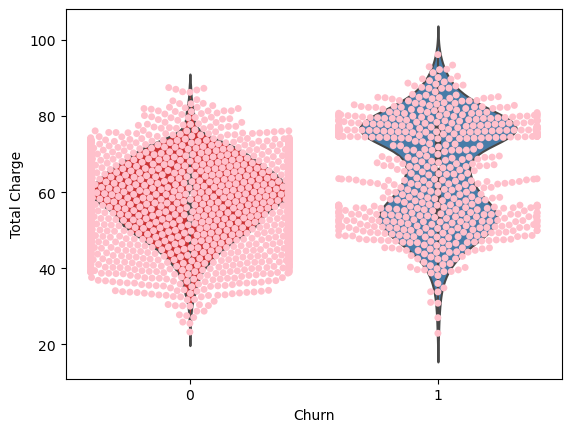

In [64]:
sns.violinplot(x="Churn",y="Total Charge", data=churn,palette='Set1', size = 5)
sns.swarmplot(x="Churn", y="Total Charge", data=churn,color='pink', size = 5)

inferences-



The swarm plot, we can observe individual data points representing each customer's total charges. The plot indicates that there is a higher density of data points for non-churned customers in the range of approximately 40 to 80 dollars. This suggests that non-churned customers are more likely to pay charges within this range.

On the other hand, churned customers are paying higher charges, as indicated by the presence of data points beyond the 80-dollar mark. This implies that customers who are more dissatisfied with the network or considering switching to another provider are willing to pay higher charges, possibly due to additional services or features they require.

From these plots, we can infer that most customers who are satisfied with the network tend to pay charges within the range of 40 to 80 dollars. However, churned customers, who are more dissatisfied or considering switching, are willing to pay higher charges, possibly indicating their willingness to invest more to find a better network or service.

# conclution:-

By analyzing these columns, we can gain insights into why customers may be looking for other networks. Here are some inferences based on the provided data:

Minutes: Customers who are using fewer minutes of conversation may be more inclined to switch networks. This could indicate dissatisfaction with the provided services or a desire for more competitive minute packages.

Charges: Customers who are paying higher charges are more likely to consider changing networks. This suggests that pricing plays a significant role in customer retention. Offering competitive pricing plans and value-added services could help reduce churn.

Account Length: The length of time a customer has been with the network may also influence churn. Longer account lengths may indicate customer loyalty and satisfaction, leading to a lower likelihood of switching networks.

International Plan: Customers who are subscribed to an international plan are more likely to stay with the current network. This could be attributed to the added benefits and convenience of international calling options, making it less desirable for customers to switch to other networks.

Voicemail Plan: Customers who have an active voicemail plan are more likely to remain with the network. This suggests that the availability of voicemail services plays a role in customer satisfaction and loyalty.

Voicemail Message: The number of voicemail messages received by customers may also impact churn. Higher voicemail message counts could indicate better engagement and communication, leading to a decreased likelihood of switching networks.

Customer Service Calls: The number of customer service calls made by customers may be an indicator of dissatisfaction or service-related issues. Customers who make more customer service calls are more likely to consider changing networks, possibly due to unresolved concerns or dissatisfaction with the provided support.

Based on these inferences, it is crucial for telecom providers to address pricing concerns, offer attractive plans and packages, improve service quality, and provide efficient customer support to reduce churn. By understanding the factors influencing churn, providers can implement strategies to enhance customer satisfaction, retention, and overall business performance.

In [65]:
churn

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,rank(Account lenght),Total Charge,Total Mins
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1100.0,75.56,717.2
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,1966.0,59.24,625.2
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,798.0,62.29,539.4
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,3036.0,66.80,564.8
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,3388.0,52.09,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,0,1,25,144.0,81,24.48,...,122,7.14,8.5,6,2.30,3,0,3976.0,49.83,498.3
4613,NM,177,408,343-6820,0,1,29,189.0,91,32.13,...,116,7.36,15.7,1,4.24,3,0,131.0,69.49,671.4
4614,VT,67,408,338-4794,0,1,33,127.5,126,21.68,...,91,9.04,13.0,3,3.51,1,0,3678.0,59.40,637.5
4615,MI,98,415,355-8388,0,1,23,168.9,98,28.71,...,96,7.45,14.3,3,3.86,0,0,2391.0,59.26,575.0


In [66]:
col = churn.pop('Account Length')

churn.insert(3, 'Account Length', col)

# MACHINE LEARNING MODELS

In [67]:
churn

,State,Area Code,Phone,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn,rank(Account lenght),Total Charge,Total Mins
0,KS,415,382-4657,128,0,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1100.0,75.56,717.2
1,OH,415,371-7191,107,0,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,1966.0,59.24,625.2
2,NJ,415,358-1921,137,0,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,798.0,62.29,539.4
3,OH,408,375-9999,84,1,0,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,3036.0,66.80,564.8
4,OK,415,330-6626,75,1,0,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,3388.0,52.09,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,510,345-7512,57,0,1,25,144.0,81,24.48,...,122,7.14,8.5,6,2.30,3,0,3976.0,49.83,498.3
4613,NM,408,343-6820,177,0,1,29,189.0,91,32.13,...,116,7.36,15.7,1,4.24,3,0,131.0,69.49,671.4
4614,VT,408,338-4794,67,0,1,33,127.5,126,21.68,...,91,9.04,13.0,3,3.51,1,0,3678.0,59.40,637.5
4615,MI,415,355-8388,98,0,1,23,168.9,98,28.71,...,96,7.45,14.3,3,3.86,0,0,2391.0,59.26,575.0


In [68]:
x=churn.iloc[:,3:-4]

In [69]:
x.head()

,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [70]:
x.pop('VMail Message')

0       25
1       26
2        0
3        0
4        0
        ..
4612    25
4613    29
4614    33
4615    23
4616     0
Name: VMail Message, Length: 4617, dtype: int64

In [71]:
x

,Account Length,International Plan,VMail Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,0,1,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,0,1,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,0,1,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,0,1,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [72]:
x.drop(['Day Calls','Eve Calls','Night Calls','International calls'],axis=1,inplace=True)

In [73]:
x

,Account Length,International Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Charge,Night Mins,Night Charge,International Mins,International Charge,CustServ Calls
0,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1
1,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1
2,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0
3,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2
4,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,0,1,144.0,24.48,187.2,15.91,158.6,7.14,8.5,2.30,3
4613,177,0,1,189.0,32.13,303.1,25.76,163.6,7.36,15.7,4.24,3
4614,67,0,1,127.5,21.68,296.1,25.17,200.9,9.04,13.0,3.51,1
4615,98,0,1,168.9,28.71,226.3,19.24,165.5,7.45,14.3,3.86,0


In [74]:
y=churn['Churn']

In [75]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
from sklearn.svm import SVC
model_sv = SVC()
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

# LOGISTICS REGRESSOR 

accuracy_score 84.4155844155844
precision_score LogisticRegression: 0.3582089552238806
[[756  43]
 [101  24]]


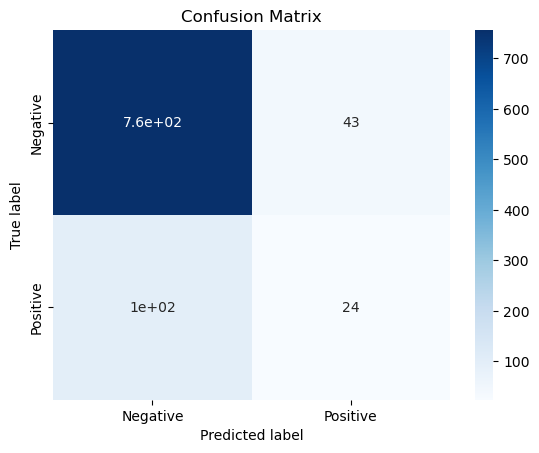

In [77]:
model_lr.fit(xtrain,ytrain)
pred_lr=model_lr.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_lr)*100)
print("precision_score LogisticRegression:",precision_score(ytest,pred_lr))
confusion_m = confusion_matrix(ytest,pred_lr)
print(confusion_m)
# plot confusion matrix
sns.heatmap(confusion_m, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# show plot
plt.show()

In [78]:
#RANDOM FOREST CLASSIFICATIER

accuracy_score 94.15584415584416
precision_score RandomForestClassifier: 0.8901098901098901
[[789  10]
 [ 44  81]]


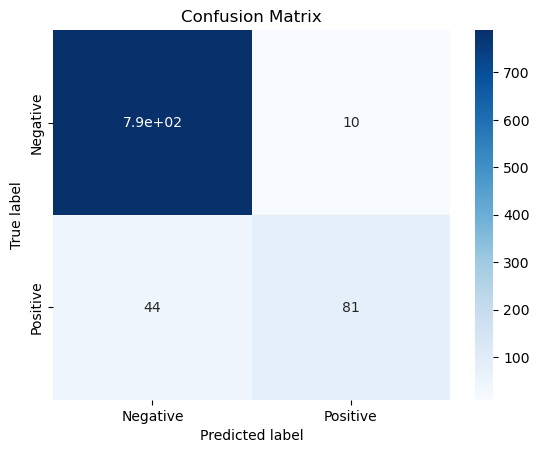

In [79]:
model_rf.fit(xtrain,ytrain)
pred_rf=model_rf.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_rf)*100)
print("precision_score RandomForestClassifier:",precision_score(ytest,pred_rf))
confusion_m = confusion_matrix(ytest,pred_rf)
print(confusion_m)
# plot confusion matrix
sns.heatmap(confusion_m, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# show plot
plt.show()

In [80]:
#DECISION TREE CLASSIFIER

accuracy_score 88.85281385281385
precision_score DecisionTreeClassifier: 0.5723684210526315
[[734  65]
 [ 38  87]]


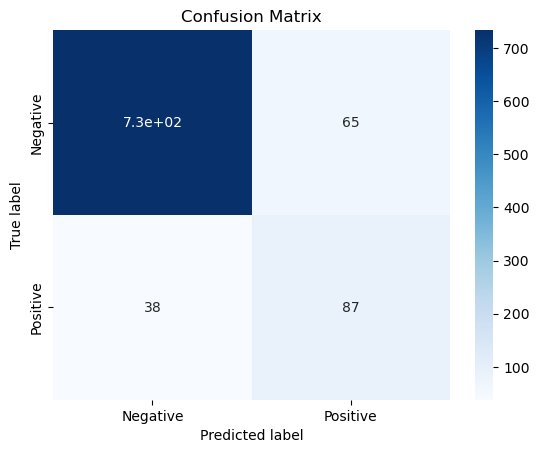

In [81]:
model_dt.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_dt)*100)
print("precision_score DecisionTreeClassifier:",precision_score(ytest,pred_dt))
confusion_m = confusion_matrix(ytest,pred_dt)
print(confusion_m)
# plot confusion matrix
sns.heatmap(confusion_m, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# show plot
plt.show()

# SVC(SUPPORT VECTOR CLASSIFIER)

accuracy_score 86.7965367965368
precision_score SVC 1.0
[[799   0]
 [122   3]]


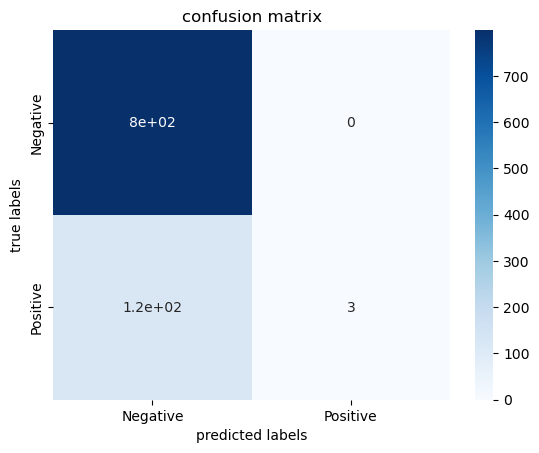

In [83]:
model_sv.fit(xtrain,ytrain)
pred_sv=model_sv.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_sv)*100)
print("precision_score SVC",precision_score(ytest,pred_sv))
confusion_m=confusion_matrix(ytest,pred_sv)
print(confusion_m)
sns.heatmap(confusion_m,annot=True,cmap='Blues',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title('confusion matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

# K-NEAREST NEIGHBORS CLASSIFIER

accuracy_score 87.87878787878788
precision_score KNeighborsClassifier 0.6274509803921569
[[780  19]
 [ 93  32]]


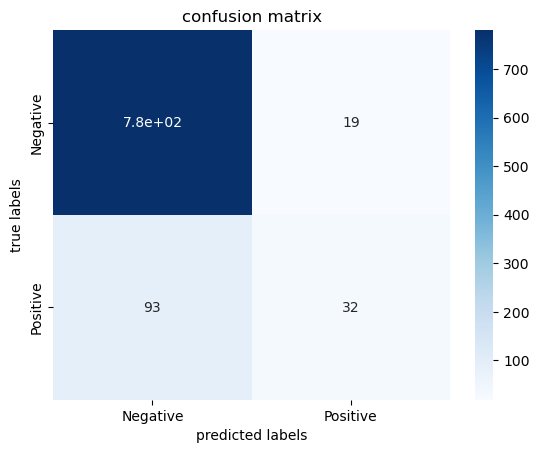

In [84]:
model_kn.fit(xtrain,ytrain)
pred_kn=model_kn.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_kn)*100)
print("precision_score KNeighborsClassifier",precision_score(ytest,pred_kn))
confusion_m=confusion_matrix(ytest,pred_kn)
print(confusion_m)
sns.heatmap(confusion_m,annot=True,cmap='Blues',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title('confusion matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

### The Support Vector Classifier (SVC) achieved a precision score of 1.0, indicating excellent performance with fewer false positive predictions. This makes the SVC model the best fit for the given dataset. It is important to consider other evaluation metrics and conduct further analysis to validate the model's performance. Overall, the SVC model shows promising results for classification tasks.

# Thanks